In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("cust_satisfaction.csv")
df

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0
103900,Male,Loyal Customer,Business travel,Business,satisfied,49,2347,5,5,4,0,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,22,1000,1,1,1,0,0.0


In [3]:
df.shape[0]

103904

In [4]:
df.duplicated().sum()

172

In [5]:
df.drop_duplicates(inplace = True)

In [6]:
df.shape[0]

103732

In [7]:
df.isnull().sum()

Gender                          0
Customer Type                   0
Type of Travel                  0
Class                           0
satisfaction                    0
Age                             0
Flight Distance                 0
Inflight entertainment          0
Baggage handling                0
Cleanliness                     0
Departure Delay in Minutes      0
Arrival Delay in Minutes      310
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.shape[0]

103422

In [10]:
df.value_counts('satisfaction')

satisfaction
neutral or dissatisfied    58636
satisfied                  44786
dtype: int64

#### Data set should be balaned. 
###### 1. For instance, a dataset with division as 60%/40% is termed as balanced whereas a division of 80%/20% is termed as imbalance. 

###### 2. Difficulties due to imbalance data: 
Imagine a case with 90% +ve data and 10% -ve data. If a model is trained with such a dataset, it is most likely to classify all the data points as +ve. Even if it classifies 100% data as positive , the model will give an accuracy of 90%.

In [11]:
df['Type of Travel'].value_counts()

Business travel    71331
Personal Travel    32091
Name: Type of Travel, dtype: int64

In [12]:
df

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0
103900,Male,Loyal Customer,Business travel,Business,satisfied,49,2347,5,5,4,0,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,22,1000,1,1,1,0,0.0


In [13]:
df['Class'].value_counts()

Business    49423
Eco         46532
Eco Plus     7467
Name: Class, dtype: int64

In [14]:
df['Inflight entertainment'].min()

0

In [15]:
df['Inflight entertainment'].max()

5

In [16]:
df['Baggage handling'].min()

1

In [17]:
df['Baggage handling'].max()

5

In [18]:
df['Cleanliness'].min()

0

In [19]:
df['Cleanliness'].max()

5

In [20]:
df2 = df[(df['Inflight entertainment'] == 5) & (df['Cleanliness'] == 5) &(df['Baggage handling'] == 5)]

In [21]:
df2.value_counts('Customer Type')

Customer Type
Loyal Customer       5805
disloyal Customer     924
dtype: int64

In [22]:
df2[(df2['Gender'] == 'Female')].value_counts('Customer Type')

Customer Type
Loyal Customer       2834
disloyal Customer     470
dtype: int64

In [23]:
df[((df['Gender'] == 'Female'))].value_counts('Customer Type')

Customer Type
Loyal Customer       42272
disloyal Customer    10228
dtype: int64

In [24]:
df3 = df[(df['Gender'] == 'Female') & (df['satisfaction'] == 'satisfied')]
df3

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
7,Female,Loyal Customer,Business travel,Business,satisfied,52,2035,5,5,4,4,0.0
16,Female,Loyal Customer,Business travel,Business,satisfied,26,2123,4,4,4,49,51.0
18,Female,Loyal Customer,Business travel,Business,satisfied,45,2486,5,5,4,7,5.0
24,Female,disloyal Customer,Business travel,Eco,satisfied,23,452,1,5,1,54,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103881,Female,Loyal Customer,Business travel,Business,satisfied,51,384,4,4,3,54,51.0
103887,Female,Loyal Customer,Personal Travel,Eco,satisfied,51,1222,3,3,4,4,0.0
103889,Female,Loyal Customer,Business travel,Business,satisfied,43,3885,3,3,3,0,0.0
103890,Female,Loyal Customer,Business travel,Eco Plus,satisfied,56,550,3,3,3,0,0.0


In [25]:
# MATPLOTLIB AND SEABORN
# AUTO EDA --> pandas-profiling

In [26]:
df['Gender'].value_counts()

Female    52500
Male      50922
Name: Gender, dtype: int64

In [27]:
# df['Gender'] = df['Gender'].map({'Female':0,'Male':1})

In [28]:
df['Customer Type'].value_counts()

Loyal Customer       84517
disloyal Customer    18905
Name: Customer Type, dtype: int64

In [29]:
# df['Customer Type'] = df['Customer Type'].map({'Loyal Customer':1 ,'disloyal Customer':0 })

In [30]:
df

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0
103900,Male,Loyal Customer,Business travel,Business,satisfied,49,2347,5,5,4,0,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,22,1000,1,1,1,0,0.0


In [31]:
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [32]:
df3 = pd.get_dummies(df , drop_first = 'if_binary').astype('int') # One Hot Encoding Representation
df3.head()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,13,460,5,4,5,25,18,1,0,1,0,1,0
1,25,235,1,3,1,1,6,1,1,0,0,0,0
2,26,1142,5,4,5,0,0,0,0,0,0,0,1
3,25,562,2,3,2,11,9,0,0,0,0,0,0
4,61,214,3,4,3,0,0,1,0,0,0,0,1


In [33]:
## Independent variable and dependent variables (X and Y)
x = df3.drop('satisfaction_satisfied', axis = 1)
x

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,13,460,5,4,5,25,18,1,0,1,0,1
1,25,235,1,3,1,1,6,1,1,0,0,0
2,26,1142,5,4,5,0,0,0,0,0,0,0
3,25,562,2,3,2,11,9,0,0,0,0,0
4,61,214,3,4,3,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,4,2,3,0,0,1,0,1,0
103900,49,2347,5,5,4,0,0,1,0,0,0,0
103901,30,1995,4,4,4,7,14,1,1,0,0,0
103902,22,1000,1,1,1,0,0,0,1,0,1,0


In [34]:
y = df3[['satisfaction_satisfied']]
y

,satisfaction_satisfied
0,0
1,0
2,1
3,0
4,1
...,...
103899,0
103900,1
103901,0
103902,0


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [37]:
# MODEL TRAINING
from sklearn.linear_model import LogisticRegression

In [38]:
lg = LogisticRegression()

In [39]:
lg.fit(x_train , y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
# Model performance (model evaluation)
print("Training Score :",round(lg.score(x_train,y_train),4)*100,"%")
print("Testing Score :",round(lg.score(x_test,y_test),4)*100,"%")

Training Score : 78.71000000000001 %
Testing Score : 78.71000000000001 %


In [41]:
prediction = lg.predict(x_test)

In [42]:
y_test['satisfaction_prediction'] = prediction

In [43]:
y_test.head(25)

,satisfaction_satisfied,satisfaction_prediction
9428,1,1
86323,0,1
75268,0,0
1402,0,0
93660,1,1
100101,0,0
29455,0,0
83415,0,0
102113,0,0
91146,1,1


In [44]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix

In [45]:
matrix = confusion_matrix(y_test['satisfaction_satisfied'] ,y_test['satisfaction_prediction'] ) # ACTUAL VALUE PREDICTED VALUE
matrix

array([[8962, 2774],
       [1629, 7320]], dtype=int64)

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

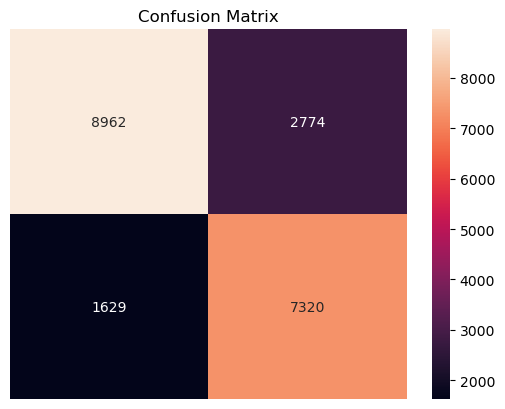

In [47]:
sns.heatmap(matrix , annot = True , fmt = 'd')
plt.title('Confusion Matrix')
plt.axis('off')
plt.show()

In [48]:
# PRECISION

num = 0
den = 0
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        if i==j:
            num+=matrix[i][j]
        den+= matrix[i][j]
round(num/den,4)*100

78.71000000000001

In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(y_test['satisfaction_satisfied'],y_test['satisfaction_prediction']))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80     11736
           1       0.73      0.82      0.77      8949

    accuracy                           0.79     20685
   macro avg       0.79      0.79      0.79     20685
weighted avg       0.79      0.79      0.79     20685



In [51]:
y_test['satisfaction_satisfied'].value_counts()

0    11736
1     8949
Name: satisfaction_satisfied, dtype: int64